# Deep Learning
# LAB - 3 Conventional Feed Forward Neural Network on MNIST dataset

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [21]:
df = tf.keras.datasets.mnist
df = df.load_data(path='mnist.npz')
(X_train, y_train), (X_test, y_test) = df

In [22]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [23]:
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

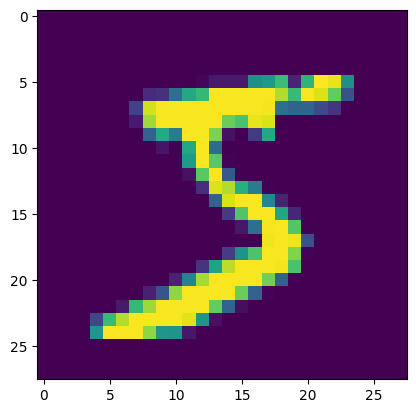

Actual: 5


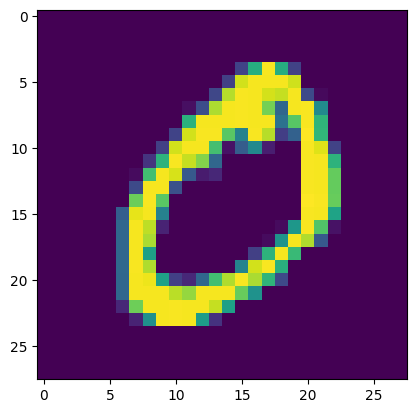

Actual: 0


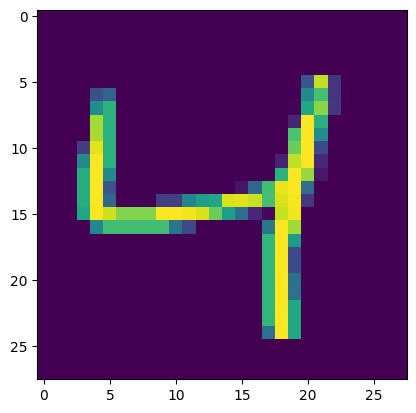

Actual: 4


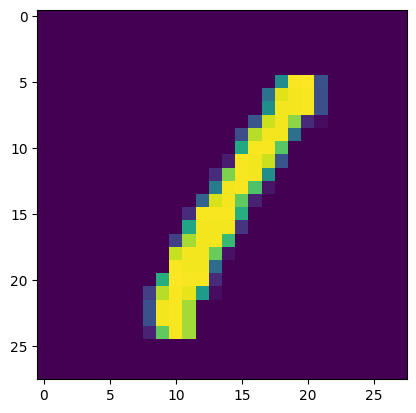

Actual: 1


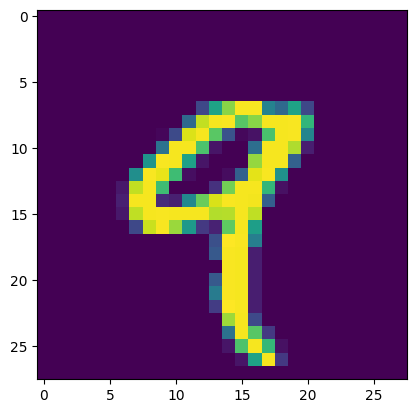

Actual: 9


In [24]:
for i in range(5):
    plt.imshow(X_train[i]) #cmap='gray'
    plt.show()
    print("Actual:",np.argmax(y_train[i]))

## Sequential API

In [25]:
model = Sequential(name='CNN_2D_MNIST_21BCM054')
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

## Model Class API

In [ ]:
# inputs = Input(shape=(28, 28, 1))
# x = Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
# x = MaxPooling2D(pool_size=(2, 2))(x)
# x = Conv2D(64, kernel_size=(3, 3), activation='relu')(x)
# x = MaxPooling2D(pool_size=(2, 2))(x)
# x = Flatten()(x)
# x = Dense(256, activation='relu')(x)
# x = Dense(128, activation='relu')(x)
# outputs = Dense(10, activation='softmax')(x)

# model = Model(inputs=inputs, outputs=outputs, name='CNN_2D_MNIST_21BCM054')

In [26]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "CNN_2D_MNIST_21BCM054"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_3 (Dense)             (None, 256)     

In [27]:
model.fit(X_train,y_train,epochs=10,verbose=1)

Epoch 1/10


1875/1875 [==============================] - 17s 9ms/step - loss: 0.1246 - accuracy: 0.9616
Epoch 2/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0422 - accuracy: 0.9867
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0296 - accuracy: 0.9905
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0212 - accuracy: 0.9934
Epoch 5/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0170 - accuracy: 0.9944
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0123 - accuracy: 0.9960
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0110 - accuracy: 0.9966
Epoch 8/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0106 - accuracy: 0.9967
Epoch 9/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0076 - accuracy: 0.9978
Epoch 10/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.00

In [28]:
model.evaluate(X_test,y_test)

 28/313 [=>............................] - ETA: 1s - loss: 0.0418 - accuracy: 0.9900   

313/313 [==============================] - 1s 4ms/step - loss: 0.0431 - accuracy: 0.9912


[0.04311428964138031, 0.9911999702453613]

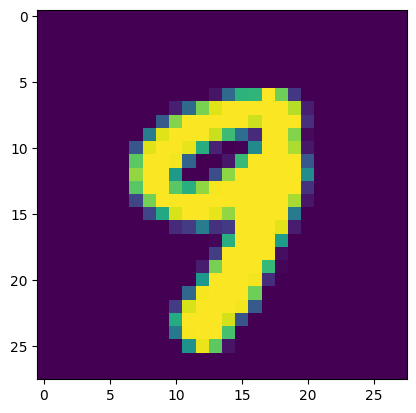

1/1 [==============================] - 0s 46ms/step
Predicted: 9
Actual: 9


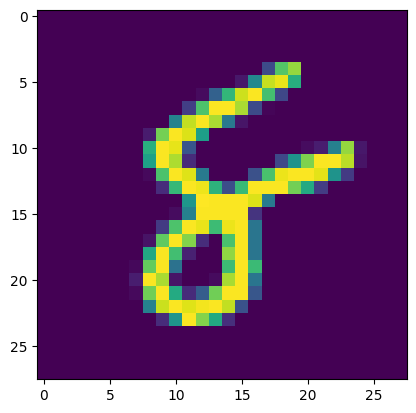

1/1 [==============================] - 0s 10ms/step
Predicted: 8
Actual: 8


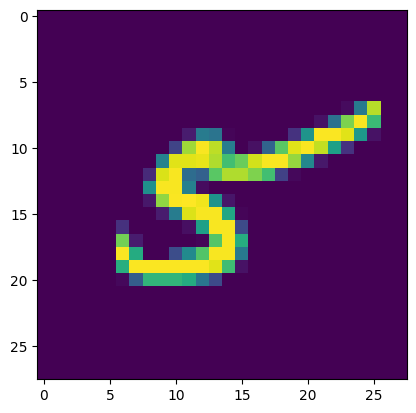

1/1 [==============================] - 0s 10ms/step
Predicted: 5
Actual: 5


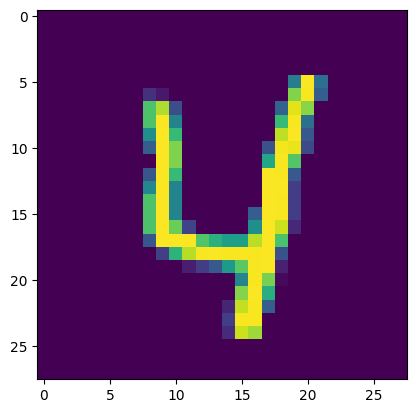

1/1 [==============================] - 0s 13ms/step
Predicted: 4
Actual: 4


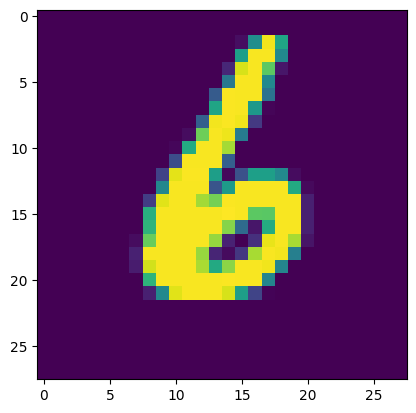

1/1 [==============================] - 0s 11ms/step
Predicted: 6
Actual: 6


In [29]:
for i in range(5):
    i = random.randint(0, len(X_test))
    plt.imshow(X_test[i])
    plt.show()
    pred = model.predict(X_test[i].reshape(1, 28, 28, 1))
    print("Predicted:",np.argmax(pred))
    print("Actual:",np.argmax(y_test[i]))

In [30]:
# model.save('CNN_2D_MNIST_21BCM054.h5')

## PART - 2

In [23]:
from PIL import Image
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [24]:
model = tf.keras.models.load_model('CNN_2D_MNIST_21BCM054.h5')

In [25]:
path_img = "pixil-frame-5.png"

In [26]:
def img_norm(img):
    img = Image.open(img).convert('LA')
    img = np.array(img)
    fimg = []
    for i in range(len(img)):
        for j in range(len(img[i])):
            fimg.append(img[i][j][1])
    fimg = np.array(fimg).reshape(28, 28)
    fimg = fimg / 255.0
    fimg = fimg.reshape(1, 28, 28, 1)
    return fimg

def visual(img):
    img = Image.open(img).convert('LA')
    img = np.array(img)
    fimg = []
    for i in range(len(img)):
        for j in range(len(img[i])):
            fimg.append(img[i][j][1])
    fimg = np.array(fimg).reshape(28, 28)
    plt.imshow(fimg)
    plt.show()

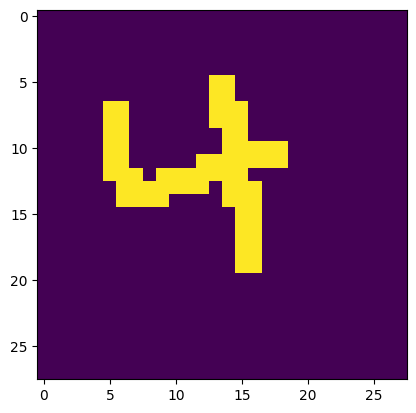

In [27]:
visual(path_img)

In [28]:
fimg = img_norm(path_img)
pred = model.predict(fimg)
print("Predicted:",np.argmax(pred))

1/1 [==============================] - 0s 54ms/step
Predicted: 4


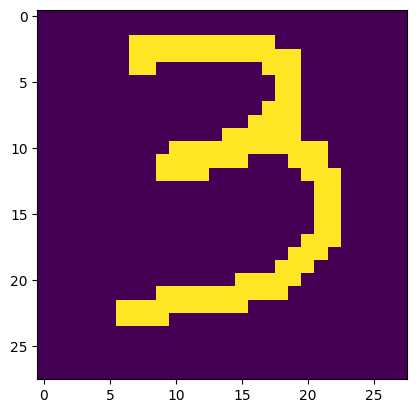

In [29]:
path_img2 = "pixil-frame-0.png"
visual(path_img2)

In [30]:
fimg2 = img_norm(path_img2)
pred2 = model.predict(fimg2)
print("Predicted:",np.argmax(pred2))

1/1 [==============================] - 0s 13ms/step
Predicted: 3
